In [1]:
import numpy as np
from timeit import default_timer as timer
import matplotlib.pyplot as plt

> note<br>
for tall $A$, left inverse of $A$ is $A^{\dagger}$<br>
$\qquad A^{\dagger} = (A^TA)^{-1}A^T$<br>
so the solution of $Ax = b$ is $x = A^{\dagger}b$

In [2]:
def get_dagger(A):
    
    Q = np.dot(A.T, A)
    dagger = np.dot(np.linalg.inv(Q), A.T)

    return dagger

In [3]:
def lstsq_with_dagger(A,b):

    dagger = get_dagger(A)
    x_hat = np.dot(dagger, b)
    
    return x_hat

In [4]:
A = np.random.rand(1000,100)
b = np.random.rand(1000)

x_hat = lstsq_with_dagger(A,b)
x_ = np.linalg.lstsq(A,b,rcond=None)[0]

np.allclose(x_hat, x_)

True

Testing Module

In [5]:
class Test:
    def __init__(self, A, b, data_size=3):
        self.A = A
        self.b = b
        self.data_size = data_size
        self.x_hat_rms = np.zeros((self.data_size))
        self.time_by_data_size = np.zeros((2,self.data_size))
        # data_size is logarithm, base 10, of real data size

    def get_operation_time(self):

        for i in range(self.data_size):
            ## set data
            m = 10**(i+1)
            n = 10**i
            A = np.random.rand(m,n)
            Q = np.zeros((m,n))
            R = np.zeros((n,n))
            b = np.random.rand(m)

            ## get solution x_hat
            ## 1. by np.linalg.lstsq
            start_lstsq = timer()
            theta = np.linalg.lstsq(A,b, rcond=None)[0]
            end_lstsq = timer()

            ## 2. by ...
            start_QR = timer()
            x_hat = lstsq_with_dagger(A,b)
            end_QR = timer()

            ## record results
            rms = np.sqrt(np.linalg.norm(theta - x_hat)**2 / n)
            self.x_hat_rms[i] = np.round(rms, 10)
            self.time_by_data_size[0,i] = end_lstsq - start_lstsq
            self.time_by_data_size[1,i] = end_QR - start_QR

    def visualize(self):
        plt.figure(figsize=(16,8))

        plt.subplot(121)
        plt.plot(self.time_by_data_size[0,:], alpha = 0.7, label="by np.linalg.lstsq")
        plt.plot(self.time_by_data_size[1,:], alpha = 0.7, label="by $x = A^{\dagger}b$")
        plt.title("Time spent depending on data size")
        plt.xlabel("data size, $10^{2k+1}$")
        plt.ylabel("Time spent (s)")
        plt.legend()

        plt.subplot(122)
        plt.plot(self.x_hat_rms[:])
        plt.title("root mean sqaure value of x_hat and theta")
        plt.xlabel("data size, $10^{2k+1}$")
        plt.ylabel("RMS value")

        plt.show()

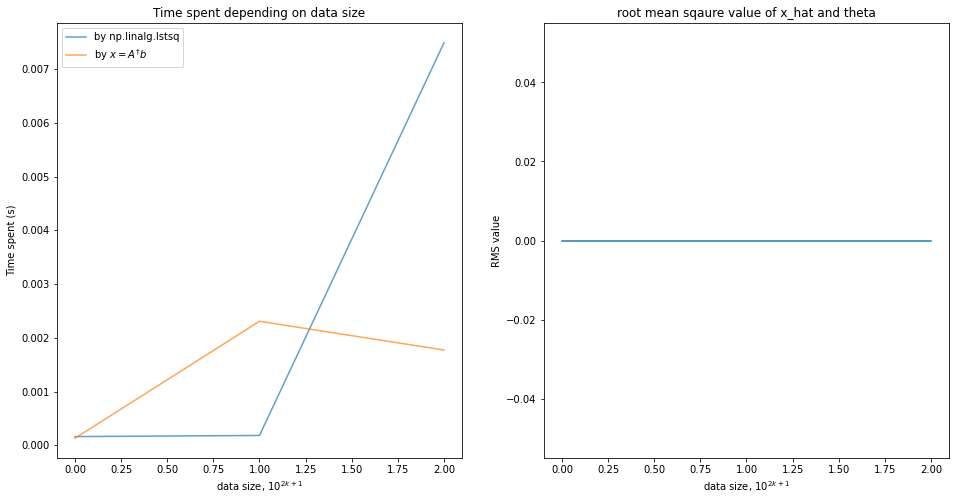

In [6]:
test = Test(A,b)
test.get_operation_time()
test.visualize()